In [3]:
!pip install faker --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.9 MB/s eta 0:00:00


In [2]:
from faker import Faker
import pandas as pd
import random
import numpy as np

# Configurar o Faker para português
fake = Faker('pt_BR')

# Critérios para cientista de dados
CRITERIOS = {
    'excel': 3,
    'power_bi': 3,
    'python': 2,
    'ingles': 5,
    'IA': 4.5,
    'NLP': 5
}

def generate_data_scientist_candidates(num_rows=300):
    data = []

    for _ in range(num_rows):
        # Gerar dados pessoais
        nome = fake.name()
        email = fake.email()
        experiencia = random.randint(0, 10)  # anos de experiência

        # Gerar habilidades com distribuição realista para cientistas de dados
        excel = random.choices([2, 3, 4, 5], weights=[0.1, 0.3, 0.4, 0.2])[0]
        power_bi = random.choices([2, 3, 4, 5], weights=[0.2, 0.3, 0.3, 0.2])[0]
        python = random.choices([1, 2, 3, 4, 5], weights=[0.1, 0.2, 0.3, 0.3, 0.1])[0]
        ingles = random.choices([4, 5], weights=[0.3, 0.7])[0]
        ia = round(np.random.normal(4.3, 0.6), 1)
        ia = max(1.0, min(5.0, ia))  # garantir que fique entre 1 e 5
        nlp = random.choices([4, 5], weights=[0.25, 0.75])[0]

        # Ajustar habilidades baseado na experiência
        if experiencia >= 5:
            ia = min(5, ia + 1.0)
            nlp = min(5, nlp + 0.5)
            power_bi = min(5, power_bi)

        # Verificar se atende aos critérios
        apto = (
            excel >= CRITERIOS['excel'] and
            power_bi >= CRITERIOS['power_bi'] and
            python >= CRITERIOS['python'] and
            ingles >= CRITERIOS['ingles'] and
            ia >= CRITERIOS['IA'] and
            nlp >= CRITERIOS['NLP']
        )

        # Calcular score de aderência
        weights = {
            'excel': 0.05,
            'power_bi': 0.05,
            'python': 0.15,
            'ingles': 0.25,
            'IA': 0.25,
            'NLP': 0.25
        }

        score = (
            (min(excel, CRITERIOS['excel']) / CRITERIOS['excel']) * weights['excel'] +
            (min(power_bi, CRITERIOS['power_bi']) / CRITERIOS['power_bi']) * weights['power_bi'] +
            (min(python, CRITERIOS['python']) / CRITERIOS['python']) * weights['python'] +
            (min(ingles, CRITERIOS['ingles']) / CRITERIOS['ingles']) * weights['ingles'] +
            (min(ia, CRITERIOS['IA']) / CRITERIOS['IA']) * weights['IA'] +
            (min(nlp, CRITERIOS['NLP']) / CRITERIOS['NLP']) * weights['NLP']
        ) * 100

        data.append({
            'nome': nome,
            'email': email,
            'experiencia': experiencia,
            'cargo': 'Cientista de Dados',
            'excel': excel,
            'power_bi': power_bi,
            'python': python,
            'ingles': ingles,
            'IA': round(ia, 1),
            'NLP': nlp,
            'status': 'Apto' if apto else 'Inapto',
            'score_aderencia': round(score, 2)
        })

    return pd.DataFrame(data)

# Gerar o dataset
df_candidatos = generate_data_scientist_candidates(300)

# Mostrar uma amostra balanceada
print("Amostra do Dataset (10 candidatos):")
print(df_candidatos.sample(10).to_string(index=False))

# Estatísticas
print("\nEstatísticas do Dataset:")
print(f"Total de candidatos: {len(df_candidatos)}")
print(f"Aptos: {len(df_candidatos[df_candidatos['status'] == 'Apto'])}")
print(f"Inaptos: {len(df_candidatos[df_candidatos['status'] == 'Inapto'])}")
print("\nDistribuição de experiência (anos):")
print(df_candidatos['experiencia'].describe())

# Salvar em CSV
df_candidatos.to_csv('candidatos_cientista_dados_completo.csv', index=False)

Amostra do Dataset (10 candidatos):
                 nome                         email  experiencia              cargo  excel  power_bi  python  ingles  IA  NLP status  score_aderencia
     Bruna Nascimento         eduarda00@example.net            6 Cientista de Dados      4         4       4       4 4.2  5.0 Inapto            93.33
 Dra. Alícia Silveira            kgomes@example.org            8 Cientista de Dados      4         4       4       4 4.0  4.5 Inapto            89.72
     Letícia Carvalho            ryan02@example.com            1 Cientista de Dados      3         4       5       5 4.7  5.0   Apto           100.00
           Davi Abreu  sousamaria-clara@example.com            0 Cientista de Dados      5         2       3       4 3.9  4.0 Inapto            85.00
       Zoe Montenegro         yanpastor@example.com            7 Cientista de Dados      3         3       5       4 5.0  4.5 Inapto            92.50
         Léo da Rocha          qrezende@example.net            1

In [3]:
df_candidatos.status.value_counts()

,count
status,
Inapto,225
Apto,75


In [4]:
df_candidatos.columns

Index(['nome', 'email', 'experiencia', 'cargo', 'excel', 'power_bi', 'python',
       'ingles', 'IA', 'NLP', 'status', 'score_aderencia'],
      dtype='object')

# Gerar Dados de Candidatos

In [4]:
from faker import Faker
import pandas as pd
import random
from collections import defaultdict

# Configurar o Faker para português
fake = Faker('pt_BR')

# Definir níveis de proficiência
PROFICIENCIAS = ['Baixa', 'Média', 'Alta', 'Avançada']

# Critérios para aprovação
CRITERIOS_APROVACAO = {
    'python': 'Alta',
    'IA': 'Alta',
    'NLP': 'Média',
    'estatistica': 'Média',
    'ingles': 'Média',  # Adicionado como importante
    'excel': 'Baixa',
    'power_bi': 'Baixa'
}

def generate_candidate():
    # Gerar informações pessoais
    nome = fake.name()
    email = fake.email()
    experiencia = random.randint(0, 15)  # anos de experiência

    # Gerar proficiências baseadas em experiência e importância
    habilidades = defaultdict(str)

    # Habilidades importantes (tendência para níveis mais altos)
    for skill in ['python', 'IA', 'NLP', 'estatistica', 'ingles']:
        if experiencia < 2:
            pesos = [0.3, 0.4, 0.2, 0.1]  # Júnior - mais média/baixa
        elif experiencia < 5:
            pesos = [0.1, 0.3, 0.4, 0.2]  # Pleno - mais alta/média
        else:
            pesos = [0.05, 0.2, 0.4, 0.35]  # Sênior - mais alta/avançada

        habilidades[skill] = random.choices(PROFICIENCIAS, weights=pesos)[0]

    # Habilidades menos importantes (tendência para níveis mais baixos)
    for skill in ['excel', 'power_bi']:
        pesos = [0.5, 0.3, 0.15, 0.05]
        habilidades[skill] = random.choices(PROFICIENCIAS, weights=pesos)[0]

    # Verificar aprovação
    aprovado = True
    for skill, nivel_minimo in CRITERIOS_APROVACAO.items():
        nivel_candidato = habilidades[skill]
        # Converter níveis para índices numéricos para comparação
        if PROFICIENCIAS.index(nivel_candidato) < PROFICIENCIAS.index(nivel_minimo):
            aprovado = False
            break

    # Calcular score de aderência (0-100)
    pontos = 0
    total_pontos = 0
    pesos = {
        'python': 0.15,
        'IA': 0.2,
        'NLP': 0.2,
        'estatistica': 0.1,
        'ingles': 0.1,
        'excel': 0.025,
        'power_bi': 0.025
    }

    for skill, peso in pesos.items():
        nivel_minimo = CRITERIOS_APROVACAO[skill]
        nivel_candidato = habilidades[skill]

        # Pontuação proporcional ao nível alcançado
        pontos += (PROFICIENCIAS.index(nivel_candidato) + 1) / 4 * peso * 100
        total_pontos += peso * 100

    score = round(pontos / total_pontos * 100, 2)

    return {
        'nome': nome,
        'email': email,
        'experiencia': experiencia,
        'cargo': 'Cientista de Dados',
        'excel': habilidades['excel'],
        'power_bi': habilidades['power_bi'],
        'python': habilidades['python'],
        'estatistica': habilidades['estatistica'],
        'IA': habilidades['IA'],
        'NLP': habilidades['NLP'],
        'ingles': habilidades['ingles'],
        'status': 'Apto' if aprovado else 'Inapto',
        'score_aderencia': score
    }

# Gerar 300 candidatos
candidatos = [generate_candidate() for _ in range(300)]
df = pd.DataFrame(candidatos)

# Mostrar amostra
print("Amostra do Dataset (10 candidatos aleatórios):")
print(df.sample(10).to_string(index=False))

# Estatísticas
print("\nEstatísticas do Dataset:")
print(f"Total de candidatos: {len(df)}")
print(f"Aptos: {len(df[df['status'] == 'Apto'])}")
print(f"Inaptos: {len(df[df['status'] == 'Inapto'])}")

# Distribuição de habilidades dos aprovados
print("\nDistribuição de habilidades dos candidatos aptos:")
aptos = df[df['status'] == 'Apto']
for skill in ['python', 'IA', 'NLP', 'estatistica', 'ingles']:
    print(f"\n{skill}:")
    print(aptos[skill].value_counts())

# Salvar em CSV
df.to_csv('candidatos_cientista_dados_proficiencia.csv', index=False)

Amostra do Dataset (10 candidatos aleatórios):
                  nome                              email  experiencia              cargo    excel power_bi   python estatistica       IA      NLP   ingles status  score_aderencia
         Aurora Novais            stellarocha@example.org            8 Cientista de Dados    Baixa    Média    Média       Média Avançada    Média     Alta Inapto            64.84
          Esther Brito cavalcantemaria-helena@example.com           14 Cientista de Dados    Média     Alta Avançada        Alta Avançada     Alta    Média   Apto            82.03
       Melina da Cunha   maria-eduardafonseca@example.org           12 Cientista de Dados    Baixa    Média Avançada    Avançada     Alta     Alta     Alta   Apto            80.47
          Juan Peixoto               sophie91@example.com           15 Cientista de Dados    Baixa    Baixa    Baixa       Média Avançada    Média Avançada Inapto            62.50
       Gabriela Castro                 ncosta@example

In [6]:
df.loc[df.status == 'Apto']

,nome,email,experiencia,cargo,excel,power_bi,python,estatistica,IA,NLP,ingles,status,score_aderencia
4,João Miguel Campos,pduarte@example.com,7,Cientista de Dados,Avançada,Alta,Avançada,Avançada,Avançada,Média,Alta,Apto,83.59
7,Ravi Caldeira,das-nevesgabriela@example.com,13,Cientista de Dados,Média,Baixa,Alta,Avançada,Alta,Média,Alta,Apto,69.53
8,Bárbara Siqueira,saluana@example.com,7,Cientista de Dados,Alta,Baixa,Avançada,Alta,Avançada,Avançada,Alta,Apto,90.62
16,Maria Sophia Gomes,zoe39@example.com,11,Cientista de Dados,Avançada,Média,Avançada,Média,Avançada,Alta,Alta,Apto,82.81
18,Samuel Costela,gmartins@example.com,15,Cientista de Dados,Baixa,Alta,Alta,Avançada,Avançada,Média,Alta,Apto,76.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Maria Isis Macedo,dom56@example.org,14,Cientista de Dados,Avançada,Alta,Avançada,Avançada,Avançada,Alta,Média,Apto,86.72
287,Théo Fogaça,gabrielamoreira@example.net,11,Cientista de Dados,Baixa,Baixa,Avançada,Alta,Alta,Alta,Avançada,Apto,79.69
290,Pietro Novaes,olopes@example.org,6,Cientista de Dados,Baixa,Média,Alta,Alta,Avançada,Avançada,Avançada,Apto,88.28
294,Sr. Gustavo da Luz,peixotoapollo@example.net,6,Cientista de Dados,Média,Alta,Avançada,Avançada,Alta,Alta,Alta,Apto,82.03


# Treinar um modelo de classificação para candidatos a Cientista de Dados

In [ ]:
!pip install  keras_tuner --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
def avaliar_modelo_cls(nome, y_true, y_pred):

    # Métricas de Classificação em %
    accuracy = round(accuracy_score(y_true, y_pred) * 100,2)
    precision = round(precision_score(y_true, y_pred) * 100,2)
    recall = round(recall_score(y_true, y_pred) * 100,2)
    f1 = round(f1_score(y_true, y_pred) * 100,2)

    #print(f"Acurácia: {accuracy:.2f}%")
    #print(f"Precisão: {precision:.2f}%")
    #print(f"Recall: {recall:.2f}%")
    #print(f"F1-Score: {f1:.2f}%")

    data = {
        'Algoritmo': [nome],
        'Acuracia': [accuracy],
        'Precisao': [precision],
        'Recall': [recall],
        'F1-score': [f1]}

    df1 = pd.DataFrame(data)
    return df1

In [ ]:

def preprocessar_dados(X: pd.DataFrame):
    # 1. Identificar colunas
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

    # 2. Aplicar LabelEncoder nas colunas categóricas (se houver)
    label_encoders = {}
    if categorical_features:
        for col in categorical_features:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le
        print(f"Salvar label encoders: categorical_encoders.joblib'")
        joblib.dump(label_encoders, f'categorical_encoders.joblib')
    else:
        print("Nenhuma coluna categórica encontrada. LabelEncoders não foram salvos.")

    # 3. Criar pipeline para dados numéricos
    numerical_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())
    ])

    # 4. Criar ColumnTransformer (apenas para numéricos)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features)
        ],
        remainder='passthrough'  # mantém colunas categóricas já codificadas
    )

    # 5. Aplicar transformação
    X_transformado = preprocessor.fit_transform(X)

    # 6. Salvar o ColumnTransformer
    print(f"Salvar Numerical transformer: numerical_preprocessor.joblib'")
    joblib.dump(preprocessor, 'numerical_preprocessor.joblib')

    print("Pré-processamento concluído e objetos salvos.")
    return X_transformado

In [ ]:
def validar_e_transformar_dados(novos_dados: pd.DataFrame, salvar_prefixo='modelo'):
    # 1. Carregar encoders se existirem
    try:
        label_encoders = joblib.load(f'{salvar_prefixo}_label_encoders.pkl')
    except FileNotFoundError:
        label_encoders = {}

    # 2. Carregar preprocessor
    preprocessor = joblib.load(f'{salvar_prefixo}_preprocessor.pkl')

    # 3. Obter colunas do treinamento
    try:
        colunas_numericas = preprocessor.transformers_[0][2]
    except:
        colunas_numericas = []

    colunas_categoricas = list(label_encoders.keys())
    todas_colunas_esperadas = colunas_numericas + colunas_categoricas

    # 4. Validar colunas
    if set(novos_dados.columns) != set(todas_colunas_esperadas):
        raise ValueError(f"\n❌ Colunas esperadas: {todas_colunas_esperadas}\n🔴 Encontradas: {novos_dados.columns.tolist()}")

    # 5. Aplicar LabelEncoders
    for col, encoder in label_encoders.items():
        novos_dados[col] = encoder.transform(novos_dados[col])

    # 6. Aplicar scaler
    dados_transformados = preprocessor.transform(novos_dados)

    print("Transformação de novos dados concluída.")
    return dados_transformados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score,  roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import warnings
warnings.filterwarnings("ignore")
import joblib  # para salvar

def run_mlp_model(df, target_column, balance_data=True):
#def run_mlp_model(df, target_column, balance_data=True, directory='mlp_tuning', project_name='mlp_auto'): # Added directory and project_name as parameters
    print("Iniciando pipeline MLP com autoajuste...\n")

    print('\nTotal de colunas consideradas:', df.shape[1])
    print("\nColunas usadas:\n", df.columns.tolist())


    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 4. Tipo de tarefa
    n_classes = len(np.unique(y))
    task_type = 'binária' if n_classes == 2 else 'multiclasse'
    print(f"\nTipo de tarefa detectado: Classificação {task_type} ({n_classes} classes)")

    X_transformed = preprocessar_dados(X)

    # 7. Treino/Teste
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoder, test_size=0.2, stratify=y, random_state=42)

    # 8. One-hot
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # 9. Modelo com KerasTuner
    def build_model(hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('input_units', 32, 128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout1', 0.1, 0.5, step=0.1)))

        for i in range(hp.Int('n_layers', 1, 3)):
            model.add(Dense(units=hp.Int(f'units_{i}', 32, 128, step=32), activation='relu'))
            model.add(Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

        model.add(Dense(n_classes, activation='softmax'))
        model.compile(
            optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
            loss='categorical_crossentropy',
            metrics=['categorical_accuracy']
        )
        return model

    tuner = kt.RandomSearch(
        build_model,
        objective='val_categorical_accuracy',
        max_trials=5,
        directory='mlp_tuning',
        project_name='mlp_auto'
    )

    early = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    print("\nBuscando melhor modelo...")
    tuner.search(X_train, y_train, epochs=100, validation_split=0.3, callbacks=[early], verbose=0)
    best_model = tuner.get_best_models(num_models=1)[0]

    best_model.save('best_model_mlp.h5')

    print(best_model.summary())

    # Salvar o best model
    joblib.dump(best_model, f'best_model.joblib')
    print("Melhor modelo salvo")

    # 10. Avaliação
    print("\nAvaliando modelo final na base de teste...")
    _, acc = best_model.evaluate(X_test, y_test, verbose=0)
    print(f"Acurácia final: {acc:.4f}")

    # 11. Previsões
    y_pred = np.argmax(best_model.predict(X_test), axis=1)
    # Convert y_test back to its original format for classification_report
    y_test_original = np.argmax(y_test, axis=1)
    print("\nRelatório de Classificação:\n", classification_report(y_test_original, y_pred)) # Use y_test_original

    # Metricas de Classificacao
    df_cls = avaliar_modelo_cls('MLP', y_test_original, y_pred) # Use y_test_original
    # 12. Matriz de Confusão Absoluta
    cm = confusion_matrix(y_test_original, y_pred) # Use y_test_original
    print("Matriz de Confusão (valores absolutos):\n", cm)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('MLP Matriz de Confusão - Absoluta')
    plt.tight_layout()
    plt.show()
    print(' ')
    # 13. Matriz de Confusão Percentual
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Greens', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('MLP Matriz de Confusão - Percentual')
    plt.tight_layout()
    plt.show()
    print(' ')
    # 14. Curva ROC
    if n_classes == 2:
        y_proba = best_model.predict(X_test)[:, 1]
        auc = roc_auc_score(y_test_original, y_proba) # Use y_test_original
        fpr, tpr, _ = roc_curve(y_test_original, y_proba) # Use y_test_original
        plt.figure(figsize=(8,5))
        plt.plot(fpr, tpr, label=f'MLP (AUC = {auc:.2f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.title('Curva ROC - Classificação Binária')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.legend()
        plt.grid()
        plt.show()
    print("\nMetricas encontradas na classificação\n")
    display (df_cls)
    print("\nPipeline finalizado com sucesso!\n")
    return df_cls

In [ ]:
df

,nome,email,experiencia,cargo,excel,power_bi,python,estatistica,machine_learning,IA,NLP,ingles,status,score_aderencia
0,Marcelo Leão,hvargas@example.net,2,Cientista de Dados,avançada,baixa,média,avançada,alta,alta,baixa,alta,Inapto,61.88
1,Diogo das Neves,hjesus@example.org,14,Cientista de Dados,baixa,baixa,avançada,média,baixa,alta,alta,média,Inapto,65.00
2,Rafaela Barros,camposjoao@example.net,10,Cientista de Dados,alta,baixa,avançada,média,baixa,avançada,avançada,avançada,Inapto,81.25
3,Ísis Andrade,sda-costa@example.net,11,Cientista de Dados,alta,baixa,avançada,alta,alta,alta,alta,baixa,Inapto,73.75
4,Joaquim Aparecida,nandrade@example.org,3,Cientista de Dados,média,baixa,média,avançada,avançada,média,alta,alta,Inapto,69.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Daniela Novaes,pguerra@example.net,12,Cientista de Dados,baixa,alta,avançada,alta,avançada,avançada,avançada,alta,Apto,92.50
296,Ana Júlia Cassiano,kmoraes@example.org,10,Cientista de Dados,baixa,baixa,avançada,alta,alta,avançada,alta,avançada,Apto,85.00
297,Eduarda Andrade,zcaldeira@example.com,13,Cientista de Dados,baixa,média,alta,alta,alta,alta,alta,avançada,Apto,75.62
298,Enrico Cassiano,albuquerqueigor@example.com,12,Cientista de Dados,média,baixa,alta,avançada,avançada,avançada,alta,média,Inapto,81.88


In [ ]:
colunas = ['experiencia', 'excel', 'power_bi', 'python', 'machine_learning', 'ingles', 'IA', 'NLP', 'status']

In [ ]:
df_cand = df[colunas]

In [ ]:
df1 = run_mlp_model(df_cand, 'status')

Iniciando pipeline MLP com autoajuste...

Tipo de tarefa detectado: Classificação binária (2 classes)
Aplicando SMOTE para balanceamento...
Reloading Tuner from mlp_tuning/mlp_auto/tuner0.json

Buscando melhor modelo...


ValueError: A total of 1 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(8, 96), Received: value.shape=(7, 96). Target variable: <Variable path=sequential/dense/kernel, shape=(8, 96), dtype=float32, value=[[-1.56314880e-01 -8.31140578e-03  1.66940451e-01  8.11580718e-02
  -1.57268018e-01  7.53441751e-02  5.63724339e-03 -5.14324009e-02
  -1.59930781e-01 -8.32908452e-02 -1.62545726e-01 -2.16419399e-01
  -1.60093188e-01 -1.44358188e-01  1.28237903e-01  1.89668983e-01
   2.26346791e-01  1.48709387e-01  7.35607743e-03 -6.72810823e-02
  -1.42558306e-01  2.40004390e-01 -6.02428764e-02  1.73510283e-01
  -5.77003658e-02 -1.14889920e-01  2.52971053e-02  2.11120933e-01
   2.01305687e-01  2.37539202e-01  1.11157894e-01  1.37137711e-01
   1.00346506e-02 -2.30786592e-01 -1.15372278e-01 -1.42054707e-01
   1.98770940e-01 -6.18831515e-02  2.76151299e-02 -7.32355118e-02
   2.80459821e-02 -7.16181993e-02 -2.97810435e-02 -2.06172675e-01
   1.71948403e-01  9.48361754e-02  1.33166164e-01 -6.50372058e-02
   2.15453148e-01  1.26146942e-01  1.85416967e-01  6.28068745e-02
  -2.17002019e-01 -1.79847941e-01 -2.32683271e-02  1.90284669e-01
  -1.20598912e-01 -7.55351484e-02  2.92159915e-02 -2.33597219e-01
   6.66740537e-02  1.78354383e-01 -1.39151067e-01 -8.95008594e-02
   2.17292994e-01  1.46026403e-01  1.20607167e-01 -4.29874063e-02
  -1.07924640e-02 -1.32769376e-01 -1.34015769e-01 -2.26413622e-01
   1.43972725e-01  2.06680298e-02  2.08475471e-01 -1.91109985e-01
   5.91009855e-02 -1.56778544e-02  3.38926613e-02  1.37919664e-01
   1.75995678e-01  5.80650270e-02 -2.03089461e-01  2.03863919e-01
   2.32880980e-01  7.26132095e-02 -1.82366222e-01 -8.62632543e-02
   5.03191948e-02  7.03925788e-02  2.51111686e-02  1.13992274e-01
   1.61620587e-01  8.20153952e-02 -2.26157635e-01  5.82877994e-02]
 [-1.92261785e-01  3.64872813e-02  1.34187818e-01 -1.48411840e-02
  -5.48749715e-02  1.45828336e-01 -3.44073772e-03  2.11144209e-01
   1.90765470e-01  1.32602900e-01  3.28968465e-02  7.19715953e-02
  -1.58275723e-01 -2.12533012e-01  1.33087993e-01 -1.78885520e-01
   9.89252925e-02  1.71542197e-01 -6.90026730e-02 -1.86243206e-02
   1.09860063e-01  1.60630345e-02 -1.90420896e-01 -2.70308852e-02
  -4.85389084e-02  1.81076229e-01  2.99498439e-04 -3.84899974e-02
   4.98916507e-02  1.82311833e-02 -1.92934886e-01 -8.43050927e-02
  -4.26018834e-02 -1.62953645e-01 -6.70568198e-02  1.20414853e-01
   9.88280475e-02  3.42767835e-02 -7.90992975e-02 -2.05617592e-01
   4.21202779e-02  8.14382136e-02 -1.87900037e-01  1.67437702e-01
   7.87352622e-02 -6.13100976e-02  1.61451668e-01 -7.06339031e-02
  -1.45314530e-01  1.38100803e-01  4.08939123e-02  5.56213260e-02
   1.80247039e-01  2.39713132e-01  2.25172371e-01  1.44928396e-01
   1.78135395e-01  1.85478985e-01 -8.98236036e-02 -1.32006198e-01
  -2.21439928e-01  1.69933826e-01  2.50647068e-02 -6.41646981e-02
   6.20925128e-02 -1.89351171e-01 -1.65918261e-01  2.15317875e-01
  -5.26309013e-05 -1.00106001e-04  2.03501195e-01 -1.74829185e-01
  -2.01012641e-01 -7.45421499e-02 -2.21171349e-01  1.38433576e-01
   4.40848470e-02  2.07931161e-01 -5.07463515e-02  9.77604389e-02
  -9.80004370e-02 -8.58865529e-02  8.71327221e-02 -2.03472689e-01
   1.55431926e-01  3.61734629e-03  2.18716115e-01 -4.25403863e-02
   4.02626693e-02  2.36497313e-01  8.68406594e-02 -2.36170143e-01
  -9.32902247e-02  6.31382167e-02 -2.04661071e-01  5.42307794e-02]
 [ 2.10622162e-01 -4.75314856e-02 -1.52831525e-01  8.74827802e-03
   1.17185831e-01 -1.99464440e-01 -6.63975179e-02  1.32160574e-01
   1.35112256e-01 -1.21973023e-01  1.26464695e-01 -2.37822726e-01
  -1.70355707e-01 -2.22375095e-01  4.16861475e-02  1.06506199e-01
   2.19175100e-01 -1.17475614e-01  9.30973589e-02 -1.04728371e-01
  -1.72205582e-01 -1.52135581e-01 -4.05876040e-02 -3.42471898e-02
  -9.81263816e-03 -1.76170290e-01  1.69825464e-01 -3.49895954e-02
  -2.61312425e-02 -4.10786569e-02 -2.08400220e-01  1.52420759e-01
  -1.67496979e-01 -5.46499044e-02  1.43538594e-01  2.13291794e-01
  -4.78178263e-05 -1.27025902e-01 -1.50506124e-01 -6.62003458e-03
   1.61152720e-01 -6.87580854e-02  1.14941120e-01  7.30423033e-02
  -9.72972065e-02 -2.36742690e-01 -1.27900943e-01  9.63446498e-02
   2.58672535e-02  1.48721308e-01 -2.25074112e-01  2.08929181e-02
   4.22501564e-02 -1.13728285e-01 -7.76975304e-02  1.91960454e-01
  -3.44298631e-02 -2.83921659e-02  2.04691947e-01 -9.49802697e-02
   6.43784106e-02  7.31429160e-02  2.17986822e-01  4.82159257e-02
   1.02274746e-01 -1.75039455e-01  1.18403852e-01 -1.64191961e-01
   1.65908933e-02  8.54269266e-02 -2.03423321e-01  1.01708472e-01
   8.37256610e-02 -2.05839336e-01  6.74155951e-02 -6.28546178e-02
   1.65330827e-01 -1.70907587e-01 -8.73094499e-02  2.24420875e-01
  -6.70887232e-02  1.05157852e-01 -1.41213402e-01  1.90793574e-01
   2.16820776e-01  1.86626315e-02  2.54471302e-02  1.79948777e-01
  -1.14942089e-01  1.74857855e-01 -6.05295002e-02 -1.68527424e-01
   1.23892516e-01  1.86919689e-01  1.08748674e-04  1.72671109e-01]
 [ 2.23655552e-01  1.61762208e-01  1.23776287e-01  1.31945997e-01
  -9.73668993e-02  1.03275985e-01  2.31178343e-01 -8.46792608e-02
  -1.62503406e-01  3.19212079e-02 -3.13711017e-02 -1.45904541e-01
   2.33986348e-01 -1.24751240e-01  7.15920329e-03  8.23415518e-02
  -9.96625870e-02 -2.34612614e-01 -1.01065218e-01 -6.19458109e-02
  -3.11332196e-02 -1.30824387e-01  1.64370507e-01 -2.03174099e-01
  -1.01430744e-01 -2.08112061e-01  1.69924825e-01  1.94628149e-01
   2.27522194e-01 -2.03677014e-01 -4.12791967e-03 -1.62477821e-01
   2.28147477e-01  7.87168741e-02  1.57138884e-01  1.86824739e-01
  -1.14121586e-01  4.70381379e-02 -8.29192996e-02  1.37311518e-01
  -5.70090562e-02 -1.11763641e-01 -1.46230459e-01 -1.79828525e-01
   8.95926058e-02 -3.37300748e-02  1.25228047e-01  4.26692367e-02
  -7.62017369e-02  8.91993642e-02  9.62444246e-02  1.28680170e-02
  -2.25620657e-01  6.48071766e-02 -2.07885236e-01  1.24562502e-01
   1.90228194e-01  8.80890787e-02  5.58446646e-02 -9.17614996e-02
   9.70759392e-02  9.63118672e-02 -1.76484346e-01  2.01862603e-01
  -1.15111426e-01  2.09486902e-01 -9.80496258e-02  1.02597088e-01
   1.42828077e-01  1.79059595e-01  1.41901761e-01 -6.13480061e-02
  -3.96065116e-02  1.96533799e-02  1.99214131e-01 -9.59996581e-02
  -1.27148628e-01 -2.17190489e-01 -2.42175758e-02  1.06347740e-01
  -2.50002295e-02 -2.20027342e-01  3.34721506e-02  1.94289982e-01
  -2.11342514e-01  3.46511602e-02  2.10526913e-01 -2.29699910e-01
  -1.15786202e-01  1.07181072e-01 -1.02111295e-01  8.11489820e-02
  -8.28998834e-02 -9.84082222e-02  1.62829012e-01 -1.50493234e-01]
 [-6.17197156e-02  1.03708684e-01  1.53932810e-01  1.00293666e-01
   9.04941857e-02 -1.80445284e-01 -1.29561156e-01 -7.47652054e-02
  -3.73943746e-02  5.86368442e-02  2.26657510e-01 -8.96876603e-02
  -4.24197763e-02 -6.57044202e-02 -2.29585603e-01 -5.70194721e-02
  -8.16842318e-02 -1.68834835e-01  9.54375863e-02  4.74969447e-02
   1.20950252e-01 -1.26080394e-01  1.49244070e-02  6.71466589e-02
  -2.33242795e-01 -1.60591751e-01  1.27289683e-01 -1.64468795e-01
   1.91561639e-01  8.97757411e-02  1.16481066e-01 -2.04323828e-02
  -2.14311764e-01  9.50130224e-02  1.89430475e-01  1.76847368e-01
   1.41925633e-01  1.71140254e-01 -1.00276828e-01 -1.86114639e-01
  -2.25968838e-01  1.45585507e-01 -2.37124860e-02  2.12114066e-01
   1.17089003e-01 -2.03915179e-01  2.29042172e-02  1.85190320e-01
  -1.05869621e-01 -2.32436717e-01  1.04424000e-01 -1.83237195e-02
   2.19087988e-01  2.90118456e-02  7.38149881e-02  3.18765342e-02
   9.54898894e-02 -1.19867221e-01 -2.08796501e-01 -1.35041013e-01
  -2.01788545e-01  2.17334211e-01 -1.70182079e-01 -4.22581136e-02
   1.52359366e-01 -1.41760066e-01  1.22080863e-01  5.17473817e-02
  -8.08407664e-02  1.78793043e-01 -1.03818685e-01  5.95044196e-02
  -1.42899096e-01  1.45907462e-01 -2.30007425e-01  7.68564641e-02
   1.69473410e-01 -3.00164074e-02 -1.35340571e-01  1.83122128e-01
  -5.44669479e-02 -7.28997588e-02  5.88014722e-04  8.62403512e-02
  -1.62880167e-01  1.08674347e-01 -1.53088838e-01 -4.88573313e-03
  -2.03663841e-01  8.54057372e-02 -1.35345504e-01 -1.28148958e-01
  -1.09266892e-01 -1.71498746e-01  1.73231065e-02  1.07171565e-01]
 [-1.68585479e-01 -1.01933718e-01  1.39889240e-01 -1.94295585e-01
  -4.22003269e-02  5.69765866e-02 -1.46722019e-01 -9.68659818e-02
   1.97648942e-01  9.21274424e-02  1.11273050e-01  8.34147036e-02
   2.97349989e-02  2.01806873e-01  1.06194735e-01 -5.14872670e-02
  -1.26356408e-01 -1.86715603e-01 -6.01960868e-02 -1.52070075e-02
   1.30307257e-01 -1.44477636e-02 -2.07291603e-01  1.09396875e-01
   1.26089543e-01  1.04159951e-01  2.80146599e-02  1.38320267e-01
   8.34284425e-02 -1.84014797e-01 -1.90989152e-01 -8.78683627e-02
  -1.89423770e-01 -1.62407160e-02 -1.21332780e-01 -1.98995784e-01
  -1.36297256e-01 -1.17797405e-02  1.74003005e-01  1.77210182e-01
   1.39758110e-01  6.23454750e-02  2.08174527e-01 -8.12070966e-02
  -8.63651335e-02  1.62208557e-01 -1.56128705e-01  2.08638906e-01
   8.15683305e-02 -1.98344499e-01  1.40968651e-01 -8.22217762e-03
  -1.80717871e-01  4.36597168e-02  8.04904103e-02  2.23977059e-01
   2.11207241e-01  7.02997446e-02 -2.99947113e-02  2.37574637e-01
  -6.20188713e-02  1.56062335e-01 -2.39574388e-01 -1.69984907e-01
   1.85387015e-01  4.04270887e-02 -1.44700065e-01  7.46259391e-02
  -2.07143337e-01  7.29589164e-03  7.63301253e-02 -2.69901752e-02
   2.39504874e-03  5.35544753e-02  1.85723513e-01  3.78732383e-02
   1.28617793e-01  4.89879847e-02  2.05444425e-01  1.89662337e-01
  -6.01616800e-02  1.73876494e-01  1.33750796e-01  2.30303377e-01
  -9.81472582e-02 -1.83548421e-01 -1.30443156e-01 -4.73445058e-02
   6.21256828e-02  2.28434652e-01 -2.10072801e-01 -8.96281004e-02
   7.11324513e-02 -1.61650896e-01  1.68359876e-01 -2.22200826e-01]
 [-2.03338966e-01  7.06446171e-02  1.16059750e-01 -1.47217482e-01
   7.60187209e-03  5.96285760e-02 -1.93548784e-01  1.31525695e-02
   1.41625047e-01 -2.67609954e-04 -4.74123061e-02 -1.26483485e-01
  -3.64331603e-02  3.82835567e-02 -1.23227954e-01  1.04780138e-01
   8.86603594e-02  8.52743089e-02  1.26581073e-01 -6.15684837e-02
  -1.02966160e-01  7.96413124e-02  1.98922068e-01 -2.24539071e-01
   1.22231632e-01  5.33303320e-02 -2.90654600e-03  9.09158587e-02
  -2.28640705e-01 -1.13241002e-01  2.07466394e-01  2.10667610e-01
   7.97660947e-02 -9.43116844e-02 -1.91687629e-01 -1.39542669e-01
   1.96540445e-01  5.80928028e-02  2.05706716e-01  3.32739353e-02
  -1.71538368e-01  8.60562325e-02 -1.24892972e-01  2.36677974e-01
  -6.60709292e-02  2.01048672e-01 -4.96797711e-02  1.20982945e-01
   1.28523886e-01  1.96580291e-01  2.31687039e-01  2.02168435e-01
   1.17242306e-01  2.36252934e-01  1.83633476e-01  7.75398612e-02
   1.79046333e-01 -7.40363300e-02 -1.36253923e-01  1.72249794e-01
   1.03193849e-01 -6.21124506e-02 -5.04118055e-02 -9.39098001e-03
  -1.47274762e-01 -2.22445697e-01  1.64806187e-01  3.13523710e-02
   1.54427558e-01 -9.77842510e-02  1.72752023e-01 -6.78604394e-02
   2.37181932e-01  3.30879390e-02 -1.71944857e-01  1.77106202e-01
  -2.05760017e-01 -1.69596642e-01 -6.60389662e-03 -1.62258774e-01
   3.41667235e-03 -6.49424940e-02  1.45236135e-01 -1.80085659e-01
  -2.11754307e-01  3.95138562e-02 -1.27561748e-01  1.96673870e-01
   2.36390501e-01  3.77923250e-03 -1.33916646e-01 -2.27729082e-01
   1.02806628e-01  2.05180943e-01  1.05412126e-01  1.56571895e-01]
 [-2.07806319e-01 -1.02851987e-02  6.13714755e-02 -1.59405023e-01
   1.63778901e-01 -7.25054294e-02 -2.17338517e-01 -1.82768121e-01
   2.75059044e-02 -3.55740488e-02  1.20964915e-01 -1.90163553e-01
  -1.56452417e-01  2.17857420e-01 -1.44166574e-01 -1.71275288e-01
  -7.43831247e-02 -4.14831787e-02  4.76288795e-02 -2.03738868e-01
  -3.43644172e-02  3.27088535e-02 -8.90515447e-02 -1.19599961e-01
  -2.13625833e-01 -1.24159619e-01  5.86275756e-03  7.38264322e-02
   1.46179944e-01  9.45579410e-02  1.06312066e-01  1.25860363e-01
   1.81328624e-01 -8.05486441e-02 -2.09691867e-01  5.68975508e-03
   5.08531630e-02  1.01926506e-01  2.26228923e-01  7.21216202e-06
   1.82967067e-01 -1.70245767e-04  8.10222328e-02  2.17342228e-01
   1.54335976e-01  5.00713289e-03 -1.89222947e-01 -1.69812083e-01
  -1.79116592e-01  2.00964987e-01 -6.93695247e-03  6.87983930e-02
   4.20312881e-02  1.77774161e-01 -2.14120492e-01 -1.76183343e-01
   5.97206056e-02 -1.03499144e-01 -2.34509751e-01 -1.92934826e-01
   1.02419794e-01 -1.32054865e-01  1.93695158e-01 -5.18317521e-03
  -1.40756309e-01 -1.61226720e-01  4.38431203e-02  3.16077769e-02
  -6.09934032e-02 -1.89700037e-01  1.71908826e-01  6.07483089e-02
  -7.60467649e-02 -6.80186599e-02 -1.09084502e-01  4.70122397e-02
   2.00271487e-01 -2.16649145e-01  3.88100743e-04  1.75040722e-01
   2.15549678e-01  4.74248528e-02  6.59608543e-02 -1.50719047e-01
   2.03185558e-01  8.18282664e-02  1.97380066e-01 -1.37695193e-01
   3.06071639e-02 -1.59060508e-02 -1.85660809e-01  1.34217799e-01
   8.08052421e-02  1.48102641e-03  1.15891576e-01  4.10387516e-02]]>

List of objects that could not be loaded:
[<Dense name=dense, built=True>]

In [ ]:
def tratar_nulos(df):
  for col in df.columns:
      if df[col].dtype == 'object':
          df[col] = df[col].fillna('não informado')
      else:
          df[col] = df[col].fillna(df[col].median())
  return df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import warnings
warnings.filterwarnings("ignore")

def run_mlp_model2(df, target_column, balance_data=True):
    print("Iniciando pipeline MLP com autoajuste...\n")

    # 1. Tratamento de nulos
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('não informado')
        else:
            df[col] = df[col].fillna(df[col].median())

    # 2. Label Encoding
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    # 3. X e y
    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]

    # 4. Tipo de tarefa
    n_classes = len(np.unique(y))
    task_type = 'binária' if n_classes == 2 else 'multiclasse'
    print(f"Tipo de tarefa detectado: Classificação {task_type} ({n_classes} classes)")

    # 5. Escalonamento
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # 6. SMOTE
    if balance_data:
        print("Aplicando SMOTE para balanceamento...")
        smote = SMOTE(random_state=42)
        X_scaled, y = smote.fit_resample(X_scaled, y)

    # 7. Treino/Teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

    # 8. One-hot
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    # 9. Modelo com KerasTuner
    def build_model(hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('input_units', 32, 128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout1', 0.1, 0.5, step=0.1)))

        for i in range(hp.Int('n_layers', 1, 3)):
            model.add(Dense(units=hp.Int(f'units_{i}', 32, 128, step=32), activation='relu'))
            model.add(Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

        model.add(Dense(n_classes, activation='softmax'))
        model.compile(
            optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
            loss='categorical_crossentropy',
            metrics=['categorical_accuracy']
        )
        return model

    tuner = kt.RandomSearch(
        build_model,
        objective='val_categorical_accuracy',
        max_trials=5,
        directory='mlp_tuning',
        project_name='mlp_auto'
    )

    early = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    print("\nBuscando melhor modelo...")
    tuner.search(X_train, y_train_cat, epochs=50, validation_split=0.3, callbacks=[early], verbose=0)
    best_model = tuner.get_best_models(num_models=1)[0]

    # 10. Avaliação
    print("\nAvaliando modelo final na base de teste...")
    _, acc = best_model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"Acurácia final: {acc:.4f}")

    # 11. Previsões
    y_pred = np.argmax(best_model.predict(X_test), axis=1)
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

    # 12. Matriz de Confusão Absoluta
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão (valores absolutos):\n", cm)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão - Absoluta')
    plt.tight_layout()
    plt.show()

    # 13. Matriz de Confusão Percentual
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Greens', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão - Percentual')
    plt.tight_layout()
    plt.show()

    # 14. Curva ROC
    if n_classes == 2:
        y_proba = best_model.predict(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(8,5))
        plt.plot(fpr, tpr, label=f'MLP (AUC = {auc:.2f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.title('Curva ROC - Classificação Binária')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.legend()
        plt.grid()
        plt.show()

    print("Pipeline finalizado com sucesso!")

Iniciando pipeline MLP com autoajuste...

Tipo de tarefa detectado: Classificação binária (2 classes)
Aplicando SMOTE para balanceamento...
Reloading Tuner from mlp_tuning/mlp_auto/tuner0.json

Buscando melhor modelo...

Avaliando modelo final na base de teste...


Acurácia final: 0.4894
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.49      0.98      0.66        47

    accuracy                           0.49        94
   macro avg       0.25      0.49      0.33        94
weighted avg       0.25      0.49      0.33        94

Matriz de Confusão (valores absolutos):
 [[ 0 47]
 [ 1 46]]


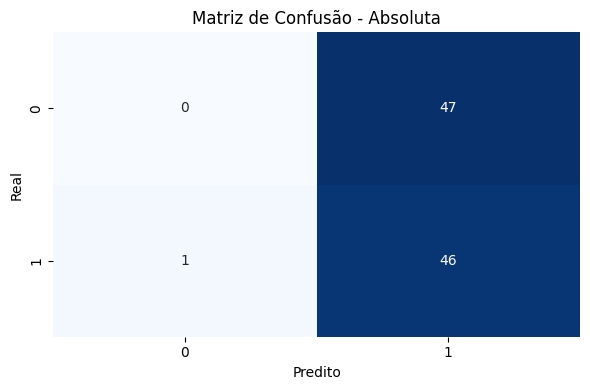

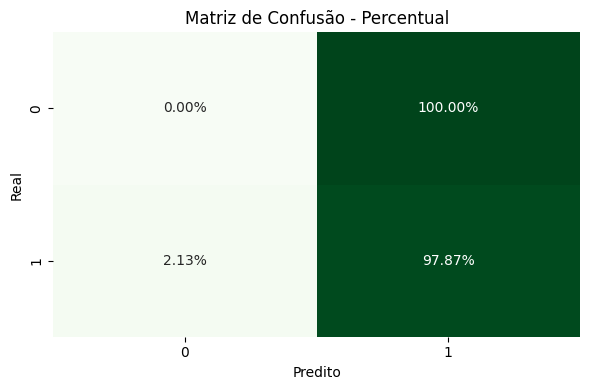

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


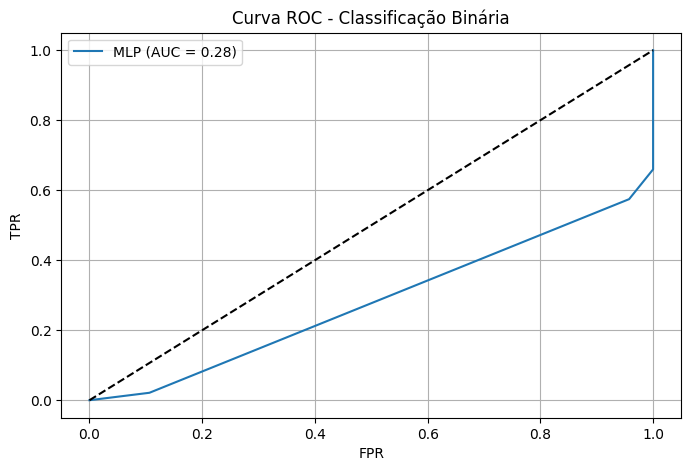

Pipeline finalizado com sucesso!


In [ ]:
df2 = run_mlp_model2(df_cand, 'status')

# RandomForestClassifier

In [5]:
df

,nome,email,experiencia,cargo,excel,power_bi,python,estatistica,IA,NLP,ingles,status,score_aderencia
0,Lucas das Neves,xfarias@example.org,1,Cientista de Dados,Média,Média,Alta,Baixa,Avançada,Média,Média,Inapto,64.06
1,Lívia Santos,ana-beatriz71@example.org,11,Cientista de Dados,Baixa,Baixa,Média,Alta,Alta,Alta,Baixa,Inapto,60.94
2,Srta. Laís Andrade,agathadas-neves@example.org,13,Cientista de Dados,Avançada,Média,Alta,Alta,Média,Alta,Avançada,Inapto,71.88
3,Helena Andrade,waragao@example.net,13,Cientista de Dados,Média,Alta,Alta,Média,Avançada,Alta,Avançada,Apto,80.47
4,Liz das Neves,luisaborges@example.org,10,Cientista de Dados,Baixa,Avançada,Alta,Avançada,Alta,Avançada,Alta,Apto,83.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Isabella Almeida,abreucaua@example.org,13,Cientista de Dados,Baixa,Baixa,Avançada,Alta,Alta,Alta,Alta,Apto,76.56
296,Dra. Luna Vargas,qsousa@example.net,2,Cientista de Dados,Baixa,Baixa,Alta,Alta,Média,Alta,Alta,Inapto,65.62
297,Srta. Heloísa Moraes,wmendonca@example.net,7,Cientista de Dados,Baixa,Baixa,Alta,Alta,Média,Média,Alta,Inapto,59.38
298,Carlos Eduardo da Rosa,juliananascimento@example.net,5,Cientista de Dados,Baixa,Baixa,Baixa,Baixa,Alta,Avançada,Avançada,Inapto,65.62


In [6]:
df.columns

Index(['nome', 'email', 'experiencia', 'cargo', 'excel', 'power_bi', 'python',
       'estatistica', 'IA', 'NLP', 'ingles', 'status', 'score_aderencia'],
      dtype='object')

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_imb_pipeline
import joblib

# Carregar os dados (usando o dataset gerado anteriormente)
# df = pd.read_csv('candidatos_cientista_dados_proficiencia.csv')
# Para este exemplo, vamos usar o DataFrame já criado na memória

# Definir a ordem das categorias para codificação ordinal
#proficiencia_order = ['Avançada', 'Alta','Média', 'Baixa']
proficiencia_order = ['Baixa', 'Média', 'Alta', 'Avançada']
features_ordinal = ['excel', 'power_bi', 'python', 'estatistica', 'ingles', 'IA', 'NLP']
cargo_order = ['Cientista de Dados']  # No nosso caso só temos um cargo

# Pré-processamento

# Criar 7 grupos de categorias de prof_order, assim cada feature pode ser uma das 4 profs indicadas
ordinal_encoder = OrdinalEncoder(
    categories=[proficiencia_order]*len(features_ordinal)
)

print('Ordinal Encoder:', ordinal_encoder)
print('size:',len(ordinal_encoder.categories)) # 7 grupos de categorias

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder,
         features_ordinal)
    ],
    remainder='passthrough'  # Manter a experiência como está
)





# Definir features (X) e target (y)
X = df[['experiencia', 'excel', 'power_bi', 'estatistica', 'python', 'ingles', 'IA', 'NLP']]
y = df['status']

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer(pos_label=1, neg_label=0)
y_bin = lb.fit_transform(y)

print(lb.classes_)  # Garante que 'apto' será 1


# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
  X, y_bin, test_size=0.3, random_state=42, stratify=y)

# Pipeline para treino (com SMOTE)
train_pipeline = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',  # Peso adicional para balanceamento
        random_state=42,
        max_depth=5,
        min_samples_split=5
    )
)

#print('\nStep -1:',train_pipeline.steps[-1]) # Nome default é o randomforestclassifier, o nome do algoritmo em minusculo

# Give a name to the RandomForestClassifier step
train_pipeline.steps[-1] = ('classifier', train_pipeline.steps[-1][1])

#print('\nStep -1:',train_pipeline.steps[-1])

# Treinar
train_pipeline.fit(X_train, y_train)

# Usado com dados novos
production_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', train_pipeline.named_steps['classifier']) # Access using the correct key
])

print('Production steps:', production_pipeline.steps)

# Salvar production_pipeline (não train_pipeline)
joblib.dump(production_pipeline, 'pipeline_rfc_cientista_dados.pkl')
print('Modelo treinado  e salvo:', 'pipeline_rfc_cientista_dados.pkl' )

# Fazer previsões
y_pred = train_pipeline.predict(X_test)

# Avaliar o modelo
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nAcurácia:", accuracy_score(y_test, y_pred))

# Feature importance
feature_names = (features_ordinal + ['experiencia'])
importances = train_pipeline.named_steps['classifier'].feature_importances_ # Access using the correct key
print("\nImportância das Features:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")


Ordinal Encoder: OrdinalEncoder(categories=[['Baixa', 'Média', 'Alta', 'Avançada'],
                           ['Baixa', 'Média', 'Alta', 'Avançada'],
                           ['Baixa', 'Média', 'Alta', 'Avançada'],
                           ['Baixa', 'Média', 'Alta', 'Avançada'],
                           ['Baixa', 'Média', 'Alta', 'Avançada'],
                           ['Baixa', 'Média', 'Alta', 'Avançada'],
                           ['Baixa', 'Média', 'Alta', 'Avançada']])
size: 7
['Apto' 'Inapto']
Production steps: [('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['Baixa', 'Média',
                                                             'Alta',
                                                             'Avançada'],
                                                            ['Baixa', 'Média',
                                                             'A

In [8]:
# Ajuste o encoder aos dados (simulando um DataFrame)
import pandas as pd
df_dummy = pd.DataFrame({col: proficiencia_order for col in features_ordinal})

# Aplicando o encoder
encoded = ordinal_encoder.fit_transform(df_dummy)
print("Exemplo de codificação:")
print(pd.DataFrame(encoded, columns=features_ordinal))

Exemplo de codificação:
   excel  power_bi  python  estatistica  ingles   IA  NLP
0    0.0       0.0     0.0          0.0     0.0  0.0  0.0
1    1.0       1.0     1.0          1.0     1.0  1.0  1.0
2    2.0       2.0     2.0          2.0     2.0  2.0  2.0
3    3.0       3.0     3.0          3.0     3.0  3.0  3.0


In [9]:
df_dummy

,excel,power_bi,python,estatistica,ingles,IA,NLP
0,Baixa,Baixa,Baixa,Baixa,Baixa,Baixa,Baixa
1,Média,Média,Média,Média,Média,Média,Média
2,Alta,Alta,Alta,Alta,Alta,Alta,Alta
3,Avançada,Avançada,Avançada,Avançada,Avançada,Avançada,Avançada


In [ ]:
OrdinalEncoder.infrequent_categories_

In [10]:
OrdinalEncoder(categories=[['baixa', 'média', 'alta', 'avançada'], ...])


OrdinalEncoder(categories=[['baixa', 'média', 'alta', 'avançada'], Ellipsis])

In [11]:
print(train_pipeline.named_steps['preprocessor'].transformers_[0][1].categories)

KeyError: 'preprocessor'

In [12]:
print(train_pipeline.named_steps['columntransformer'].transformers_[0][1].categories) # Changed 'preprocessor' to 'columntransformer'

[['Baixa', 'Média', 'Alta', 'Avançada'], ['Baixa', 'Média', 'Alta', 'Avançada'], ['Baixa', 'Média', 'Alta', 'Avançada'], ['Baixa', 'Média', 'Alta', 'Avançada'], ['Baixa', 'Média', 'Alta', 'Avançada'], ['Baixa', 'Média', 'Alta', 'Avançada'], ['Baixa', 'Média', 'Alta', 'Avançada']]
